# Exploratory Data Analysis (EDA)

This notebook performs EDA on the `teleCust1000t.csv` dataset.

In [2]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/teleCust1000t.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)
data.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Dataset Overview

In [3]:

# Overview of the dataset
print("Dataset Info:")
print(data.info())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None

Descriptive Statistics:
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.5

## Target Variable Distribution


Target Variable Distribution:
custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20388\1701610512.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_column, data=data, palette='viridis')


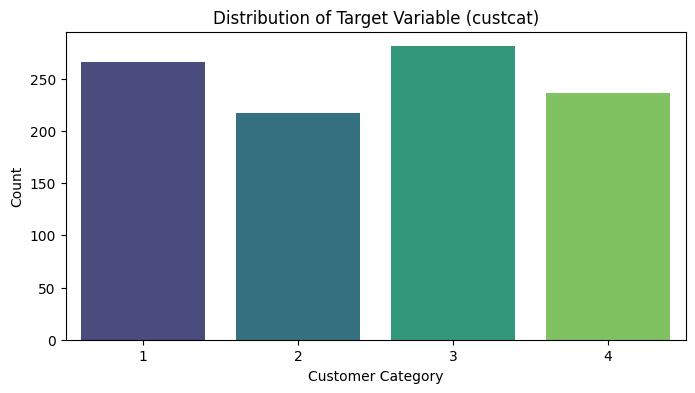

In [4]:

# Distribution of the target variable
target_column = 'custcat'
print("\nTarget Variable Distribution:")
print(data[target_column].value_counts())

# Visualize target variable distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=target_column, data=data, palette='viridis')
plt.title('Distribution of Target Variable (custcat)')
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.show()


## Numerical Feature Distributions

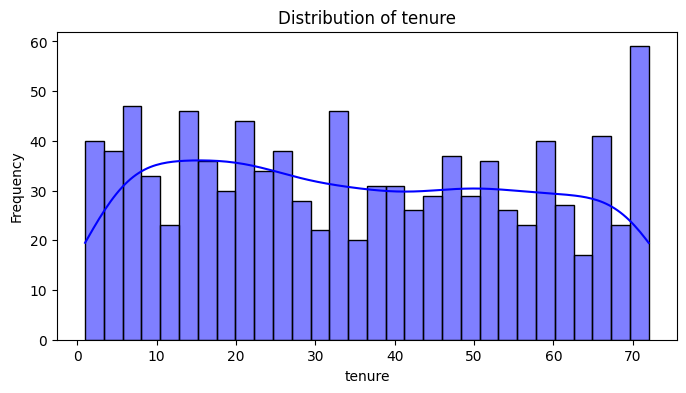

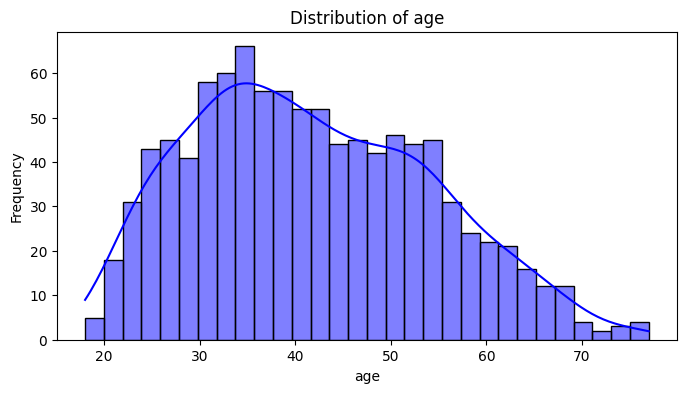

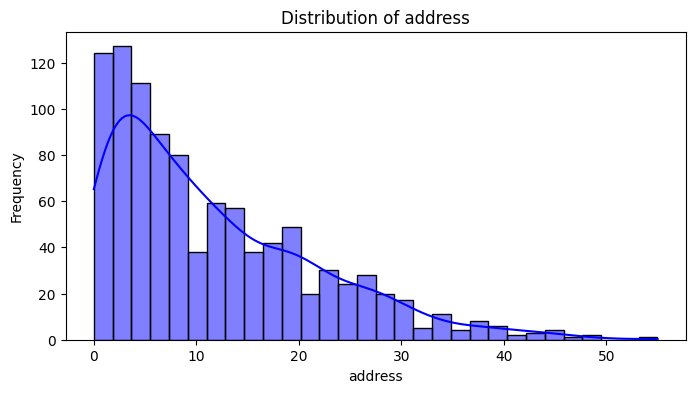

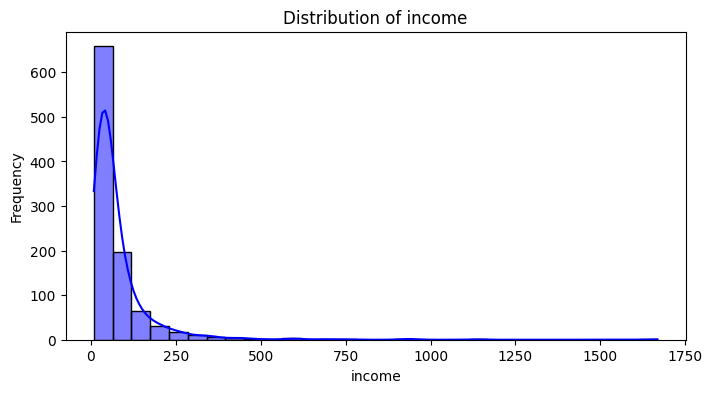

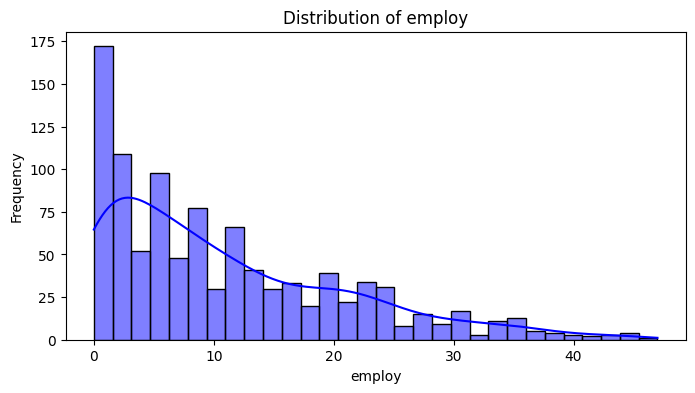

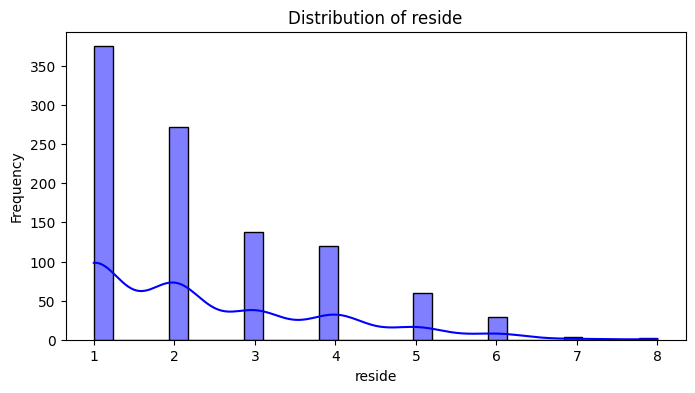

In [5]:

# Visualize distributions of numerical features
numerical_columns = ['tenure', 'age', 'address', 'income', 'employ', 'reside']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Data Cleaning and Preprocessing

In [6]:

# Handle outliers in numerical columns using the IQR method
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

numerical_columns = ['tenure', 'age', 'address', 'income', 'employ', 'reside']
data = handle_outliers(data, numerical_columns)


## Balancing the Dataset

In [7]:

from imblearn.over_sampling import SMOTE

# Separate features and target
X = data.drop(columns=['custcat'])
y = data['custcat']

# Balance the classes using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Combine balanced dataset
balanced_data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.DataFrame(y_balanced, columns=['custcat'])], axis=1)


## Preparing the Dataset for Production

In [8]:

# Save the cleaned and balanced dataset
balanced_data_path = 'cleaned_balanced_dataset.csv'
balanced_data.to_csv(balanced_data_path, index=False)
print(f"Cleaned and balanced dataset saved to: {balanced_data_path}")


Cleaned and balanced dataset saved to: cleaned_balanced_dataset.csv


## Balancing the Dataset with SMOTETomek

In [9]:

from imblearn.combine import SMOTETomek

# Apply SMOTETomek to balance the dataset and remove noisy samples
smote_tomek = SMOTETomek(random_state=42)
X_balanced, y_balanced = smote_tomek.fit_resample(X, y)

# Combine balanced dataset into a single DataFrame
balanced_data_smote_tomek = pd.concat(
    [pd.DataFrame(X_balanced, columns=X.columns), pd.DataFrame(y_balanced, columns=['custcat'])], axis=1
)

# Save the cleaned and balanced dataset
balanced_smote_tomek_path = 'cleaned_balanced_smote_tomek_dataset.csv'
balanced_data_smote_tomek.to_csv(balanced_smote_tomek_path, index=False)
print(f"Cleaned and balanced dataset saved to: {balanced_smote_tomek_path}")


Cleaned and balanced dataset saved to: cleaned_balanced_smote_tomek_dataset.csv
